# Assumptions

1. Data Cleanliness: the data is assumed to be cleaned with no missing values and no need for preprocessing. 
2. Feature Relevance: It is assumed from the Young-Laplace equation that the features in the dataset are adequate predictors for Permeability.


# Performance Evaluation

After randomly sampling the the data, then randomly splitting the samples into train and test sets, the model still has an r2 score of 1.0 which is impossible and leads me to believe in the possible validity of two things. 
1. the Young-Laplace equation represents physical reality at approximatly 100%
2. the data provided was synthetically generated. 
It might be either or, maybe even both. 


*p.s. porosity looks like a good feature to add as it is one of the most important features for a RandomForestRegressor, however since the r2 score cannot be approved I did not add it.*

# Code

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from random import randint
df = pd.read_csv('hw3_data.csv')
df = df.sample(frac=1)
df.head()


,sample_num,"Permeability, nD","Porosity, fraction",r100,r99,r98,r97,r96,r95,r94,...,r10,r9,r8,r7,r6,r5,r4,r3,r2,r1
14,29,7200.0,0.0507,2.097343,2.171746,2.295380,2.533262,2.827104,3.098451,3.385901,...,10.994354,11.031609,11.068863,11.106117,11.143372,11.254658,11.401528,11.548397,11.695266,11.842135
74,55,45400.0,0.0610,2.024449,2.169391,2.316325,2.464559,2.652243,2.846632,3.013581,...,746.807450,794.568784,843.359206,927.827983,1021.866609,1110.071530,1218.212410,1345.427760,1584.363202,1859.435639
162,39,179030000.0,0.4090,1.884984,3.452479,5.838592,17.789119,37.831766,62.357424,107.827409,...,5633.639999,5718.672266,5757.542574,5777.797816,5777.797816,5778.721807,5949.713767,6133.340620,6407.945266,6686.665803
109,34,3000000.0,0.1900,3.019776,3.365149,3.550203,3.676174,3.835634,4.044356,4.910550,...,1156.720048,1185.665551,1221.514158,1280.044058,1338.573958,1399.076884,1465.912944,1532.554803,1596.787003,1693.181531
81,183,425000.0,0.0508,59.925316,61.337805,62.750293,64.307473,70.565960,74.903128,76.772681,...,600.691309,623.783943,651.080510,678.377077,738.118081,811.744867,870.055008,927.684445,985.313881,3293.754748


In [70]:
# data management
feature_cols = [c for c in df.columns if 'r' in c]
feature_cols.append('Porosity, fraction')
target_cols = ['Permeability, nD']

features = df[feature_cols]
target = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target, 
    test_size=0.2, 
    random_state=randint(1, 100)
    )

In [ ]:
# feature importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(features, target)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature':feature_cols, 'Importance':importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

/Users/greysonnewton/Library/Caches/pypoetry/virtualenvs/big-data-analytics-IOmqK9c5-py3.11/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                Feature  Importance
0      Permeability, nD    0.949426
60                  r42    0.008322
95                   r7    0.002286
46                  r56    0.002258
102  Porosity, fraction    0.002233
..                  ...         ...
51                  r51    0.000004
56                  r46    0.000004
50                  r52    0.000003
47                  r55    0.000002
28                  r74    0.000002

[103 rows x 2 columns]


In [72]:
model = LinearRegression()
pd.DataFrame({'cv_score':cross_val_score(model, features, target, cv=5, scoring='r2')})

,cv_score
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
y_test.head(3)


,"Permeability, nD"
107,7200000.0
99,25000000.0
134,1230000.0


Text(0.5, 1.0, 'Permeability, nD')

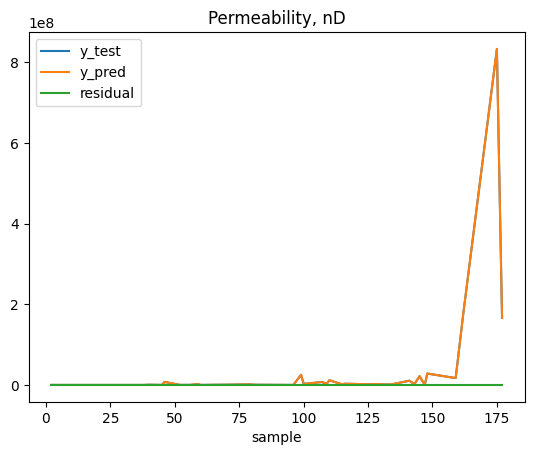

In [75]:
# modelResults = pd.DataFrame(y_pred, columns=['y_pred'])
y_test['y_pred'] = model.predict(X_test)
y_test = y_test.rename(columns={'Permeability, nD': 'y_test'})
y_test.index.name = 'sample'
y_test['residual'] = y_test['y_pred'] - y_test['y_test']
ax = y_test.sort_index(ascending=True).reset_index().plot(
    kind='line', x='sample', y=['y_test', 'y_pred', 'residual'])
ax.set_title('Permeability, nD')

In [76]:
metrics = {
    'mse': mean_squared_error(y_test['y_test'], y_test['y_pred']),
    'mae': mean_absolute_error(y_test['y_test'], y_test['y_pred']),
    'r2': r2_score(y_test['y_test'], y_test['y_pred'])
}
metrics

{'mse': 8.63084275960524e-12, 'mae': 1.2704305637119735e-06, 'r2': 1.0}

# Performance Evaluation